# Convolutional Neural Network

### Importing the libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
tf.__version__

'2.15.0'

### Define constants

In [4]:
batch_size = 8
img_h = 160
img_w = 160

epochs = 100
initial_learning_rate = 0.001
L2regularization = 0.001

### create train dataset

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "dataset/training_ds",
  image_size=(img_h, img_w),
  batch_size=batch_size)

Found 104 files belonging to 2 classes.


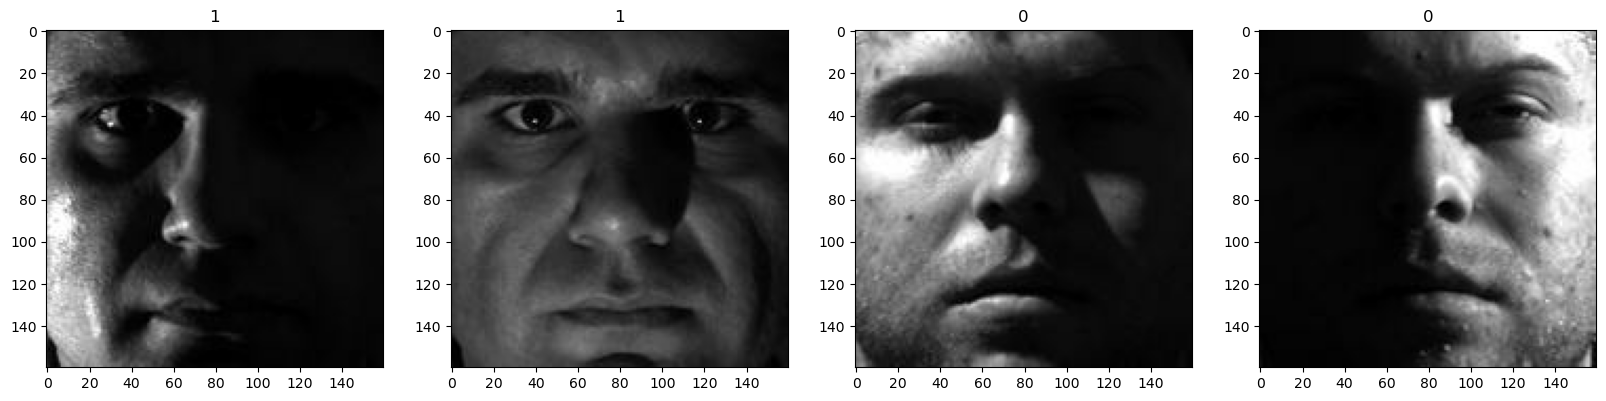

In [5]:
data_iterator = train_ds.as_numpy_iterator()
batch = data_iterator.next()
fix, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


### create test dataset

In [6]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  "dataset/test_ds",
  image_size=(img_h, img_w),
  batch_size=batch_size)

Found 24 files belonging to 2 classes.


In [7]:
class_names = train_ds.class_names
print(class_names)

['person_1', 'person_2']


In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(8, 160, 160, 3)
(8,)


## Configure the dataset for performance

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Create Model

In [10]:
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_h, img_w, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size = 4),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size = 2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(pool_size = 2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(148, activation='relu'),
  layers.Dense(num_classes)
])

## Compile the model

In [11]:
model.compile(optimizer= tf.keras.optimizers.Adam(
    learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Model summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 40, 40, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        1

## Train the model

In [13]:
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/100


13/13 [==============================] - 2s 36ms/step - loss: 2.3345 - accuracy: 0.5000 - val_loss: 0.8416 - val_accuracy: 0.5000
Epoch 2/100
13/13 [==============================] - 0s 21ms/step - loss: 0.8613 - accuracy: 0.4904 - val_loss: 0.7038 - val_accuracy: 0.5000
Epoch 3/100
13/13 [==============================] - 0s 21ms/step - loss: 0.6949 - accuracy: 0.3654 - val_loss: 0.5442 - val_accuracy: 0.5000
Epoch 4/100
13/13 [==============================] - 0s 21ms/step - loss: 0.9621 - accuracy: 0.5192 - val_loss: 0.7790 - val_accuracy: 0.5000
Epoch 5/100
13/13 [==============================] - 0s 20ms/step - loss: 0.6762 - accuracy: 0.5096 - val_loss: 0.5187 - val_accuracy: 0.4167
Epoch 6/100
13/13 [==============================] - 0s 21ms/step - loss: 0.4509 - accuracy: 0.4327 - val_loss: 0.1096 - val_accuracy: 0.5000
Epoch 7/100
13/13 [==============================] - 0s 21ms/step - loss: 0.1913 - accuracy: 0.4231 - val_loss: 0.0000e+00 - val_accuracy: 0.5000


Epoch 53/100
13/13 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 0.3173 - val_loss: 0.0000e+00 - val_accuracy: 0.4583
Epoch 54/100
13/13 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.3173 - val_loss: 0.0000e+00 - val_accuracy: 0.4583
Epoch 55/100
13/13 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.3173 - val_loss: 0.0000e+00 - val_accuracy: 0.4583
Epoch 56/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 0.3173 - val_loss: 0.0000e+00 - val_accuracy: 0.4583
Epoch 57/100
13/13 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 0.3173 - val_loss: 0.0000e+00 - val_accuracy: 0.4583
Epoch 58/100
13/13 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 0.3173 - val_loss: 0.0000e+00 - val_accuracy: 0.4583
Epoch 59/100
13/13 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accura

## visual resluts

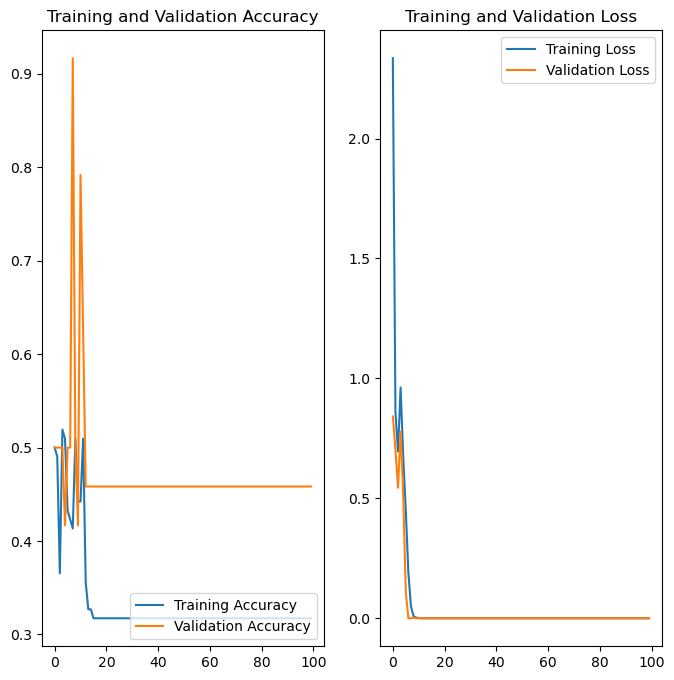

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Data augmentation

In [15]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_h,
                                  img_w,
                                  3)),
    layers.RandomContrast(0.6),
  ]
)


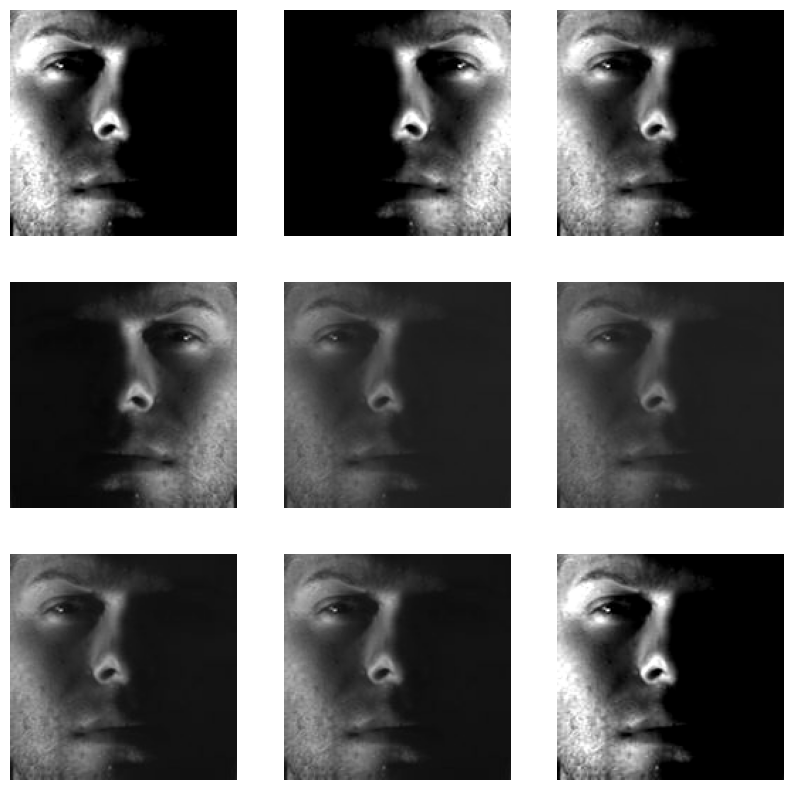

In [16]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
    
 

## re-create model (augmented and dropout)

In [21]:
num_classes = len(class_names)
model = Sequential([
  data_augmentation,
    
  layers.Rescaling(1./255, input_shape=(img_h, img_w, 3)),
    
  layers.Conv2D(16, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2regularization), bias_regularizer=tf.keras.regularizers.l2(L2regularization)),
  layers.MaxPooling2D(pool_size = 4),
  layers.BatchNormalization(),
    
  layers.Conv2D(32, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2regularization), bias_regularizer=tf.keras.regularizers.l2(L2regularization)),
  layers.MaxPooling2D(pool_size = 2),
  layers.BatchNormalization(),

  layers.Conv2D(64, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2regularization), bias_regularizer=tf.keras.regularizers.l2(L2regularization)),
  layers.AveragePooling2D(pool_size = 2),
  layers.BatchNormalization(),
    
  layers.Dropout(0.1),
    
  layers.Flatten(),
    
  layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(L2regularization), activation='relu'),
  layers.Dense(148, kernel_regularizer=tf.keras.regularizers.l2(L2regularization), activation='relu'),
  layers.Dense(1, activation='sigmoid', name="output")
])

## Re-Compile the model

In [22]:
model.compile(optimizer= tf.keras.optimizers.Adam(
    learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 158, 158, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 39, 39, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 39, 39, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 32)       

## Re-Train the model

In [24]:
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs,
)

Epoch 1/100
13/13 [==============================] - 2s 33ms/step - loss: 1.8136 - accuracy: 0.7019 - val_loss: 1.3774 - val_accuracy: 0.8333
Epoch 2/100
13/13 [==============================] - 0s 20ms/step - loss: 1.0814 - accuracy: 0.8846 - val_loss: 1.3434 - val_accuracy: 0.9167
Epoch 3/100
13/13 [==============================] - 0s 20ms/step - loss: 0.9694 - accuracy: 0.9231 - val_loss: 1.3685 - val_accuracy: 0.7083
Epoch 4/100
13/13 [==============================] - 0s 21ms/step - loss: 0.8366 - accuracy: 0.9904 - val_loss: 1.4769 - val_accuracy: 0.5000
Epoch 5/100
13/13 [==============================] - 0s 19ms/step - loss: 0.7613 - accuracy: 0.9904 - val_loss: 1.3646 - val_accuracy: 0.5000
Epoch 6/100
13/13 [==============================] - 0s 19ms/step - loss: 0.7345 - accuracy: 1.0000 - val_loss: 1.3182 - val_accuracy: 0.6667
Epoch 7/100
13/13 [==============================] - 0s 19ms/step - loss: 0.7230 - accuracy: 1.0000 - val_loss: 1.2806 - val_accuracy: 0.7500
Epoch 

13/13 [==============================] - 0s 20ms/step - loss: 0.2449 - accuracy: 1.0000 - val_loss: 0.2422 - val_accuracy: 1.0000
Epoch 59/100
13/13 [==============================] - 0s 20ms/step - loss: 0.2394 - accuracy: 1.0000 - val_loss: 0.2366 - val_accuracy: 1.0000
Epoch 60/100
13/13 [==============================] - 0s 21ms/step - loss: 0.2340 - accuracy: 1.0000 - val_loss: 0.2313 - val_accuracy: 1.0000
Epoch 61/100
13/13 [==============================] - 0s 19ms/step - loss: 0.2288 - accuracy: 1.0000 - val_loss: 0.2261 - val_accuracy: 1.0000
Epoch 62/100
13/13 [==============================] - 0s 19ms/step - loss: 0.2238 - accuracy: 1.0000 - val_loss: 0.2212 - val_accuracy: 1.0000
Epoch 63/100
13/13 [==============================] - 0s 19ms/step - loss: 0.2186 - accuracy: 1.0000 - val_loss: 0.2165 - val_accuracy: 1.0000
Epoch 64/100
13/13 [==============================] - 0s 21ms/step - loss: 0.2138 - accuracy: 1.0000 - val_loss: 0.2113 - val_accuracy: 1.0000
Epoch 65/100

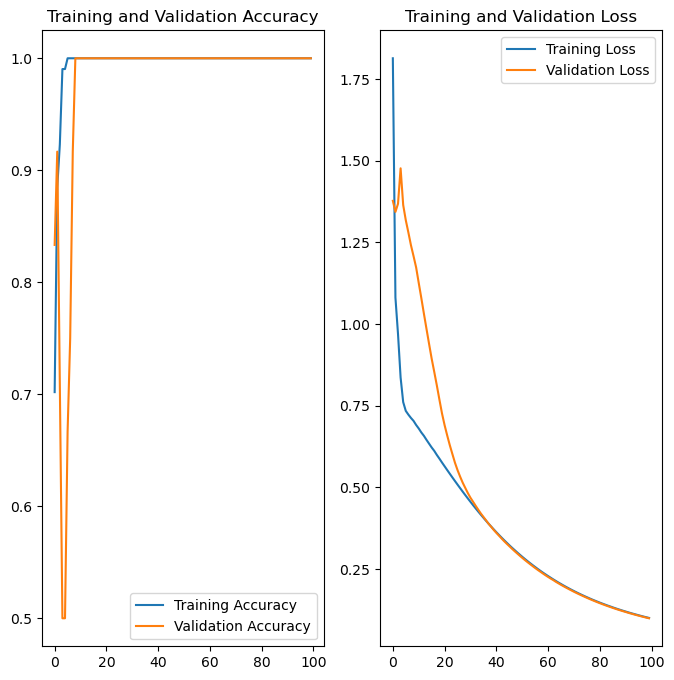

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Part 4 - Making a single prediction

In [40]:
import numpy as np
from sklearn.metrics import f1_score

img = tf.keras.utils.load_img(
    'dataset/checking/p1_or_p2_2.jpg', target_size=(img_h, img_w)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
 
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 38ms/step
This image most likely belongs to person_2 with a 72.93 percent confidence.


In [41]:
import numpy as np
from sklearn.metrics import f1_score

img = tf.keras.utils.load_img(
    'dataset/checking/p1_or_p2_2.jpg', target_size=(img_h, img_w)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Replace 'true_label' with the actual true label index
true_label = 1

# Convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
threshold = 0.5
binary_prediction = 1 if np.max(score) > threshold else 0

# Calculate F1 score
f1 = f1_score([true_label], [binary_prediction])

print(
    "Predicted class: {}, True class: {}, F1 Score: {:.2f}%"
    .format(class_names[np.argmax(score)], class_names[true_label], f1 * 100)
)

1/1 [==============================] - 0s 25ms/step
Predicted class: person_2, True class: person_2, F1 Score: 100.00%
